In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Problem Definition
we will train Multivariate Regression model on dataset to predict the future sales of a product using Calculus

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Each row corrsponds to advertising cost spent by the business on various advertising platforms (TV, Radio, Newspaper), and the class (Sales) corrsponds to Number of units sold

In [8]:
# display info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
# check whether there is missing values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
# check if there is duplicates
df.duplicated().sum()

0

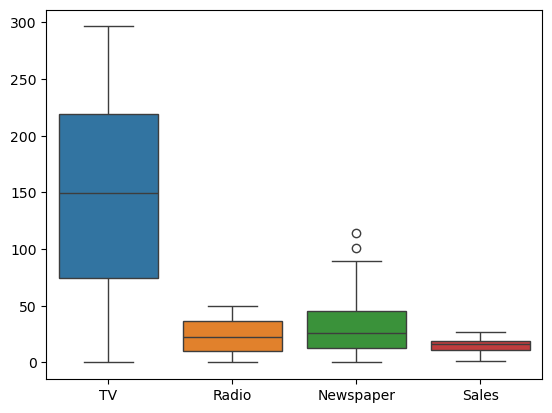

In [57]:
# Cheching the outliers
sns.boxplot(data = df)
plt.show()

We concluded that there is outliers in Newspaper column now we will display the quich sumary stats for this column to determine whther git rid of the outliers or keep them

In [59]:
df["Newspaper"].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

In [66]:
# removing outliers as there is much gap between 75th percentile and max value
twenty_fifth = df["Newspaper"].quantile(0.25)
seventy_fifth = df["Newspaper"].quantile(0.75)
news_iqr = seventy_fifth - twenty_fifth

# define lower and upper thresholds
lower = twenty_fifth - (1.5 * news_iqr)
upper = seventy_fifth + (1.5 * news_iqr)

# keep only not outliers
df = df[(df["Newspaper"] > lower) & (df["Newspaper"] < upper)]

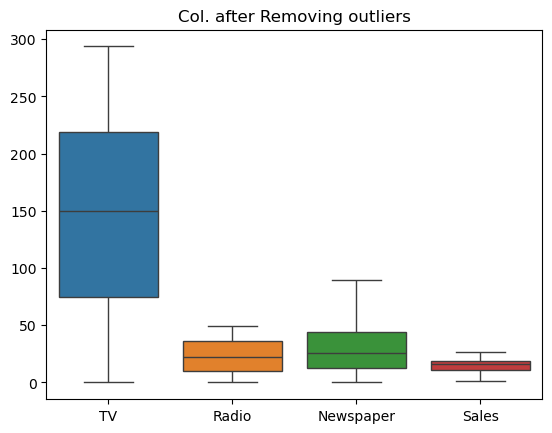

In [97]:
# Showing Newspaper column after removing outliers
g = sns.boxplot(data = df)
g.set_title("Col. after Removing outliers")
plt.show()

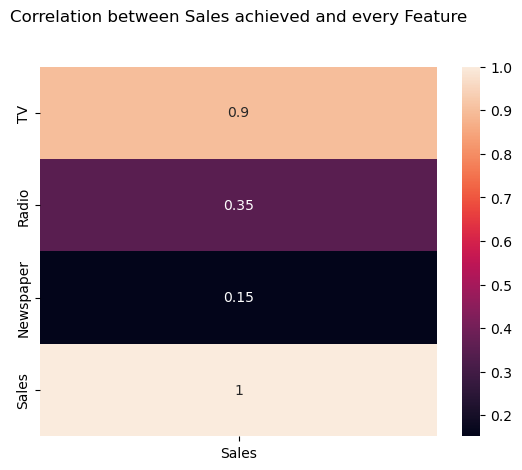

In [73]:
# defining the relation between sales and every feature
correlation = df.corr()
g = sns.heatmap(correlation[[df.columns[-1]]], annot = True)
g.set_title("Correlation between Sales achieved and every Feature", y = 1.1)
plt.show()

From heatmap we see that sales is positive correlated with all features advertising, but more correlated with TV advertising so by increasing the TV advertisment the sales increases.

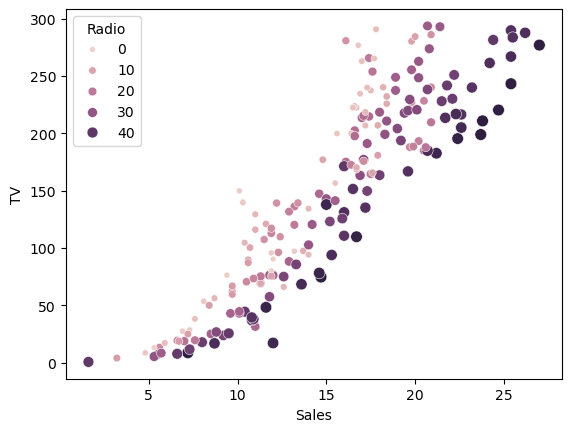

In [74]:
# Relation between sales and TV ad given Radio ad.
sns.scatterplot(data = df, x = "Sales", y = "TV", hue = "Radio", size = "Radio")
plt.show()

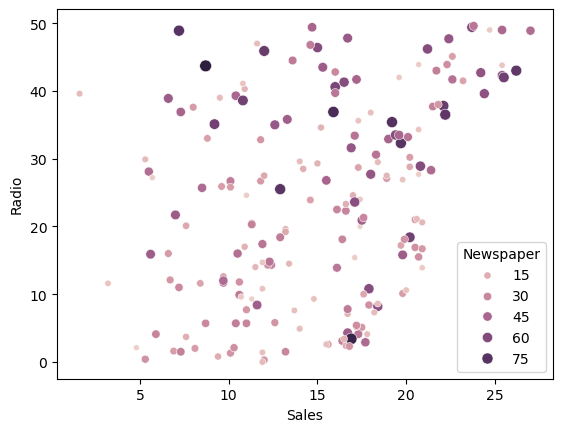

In [75]:
# Relation between sales and Radio ad given Newspaper ad.
sns.scatterplot(data = df, x = "Sales", y = "Radio", hue = "Newspaper", size = "Newspaper")
plt.show()

As we see the relation between Sales and Radio Ads. depending on Newspaper Ads is does not give any insights.

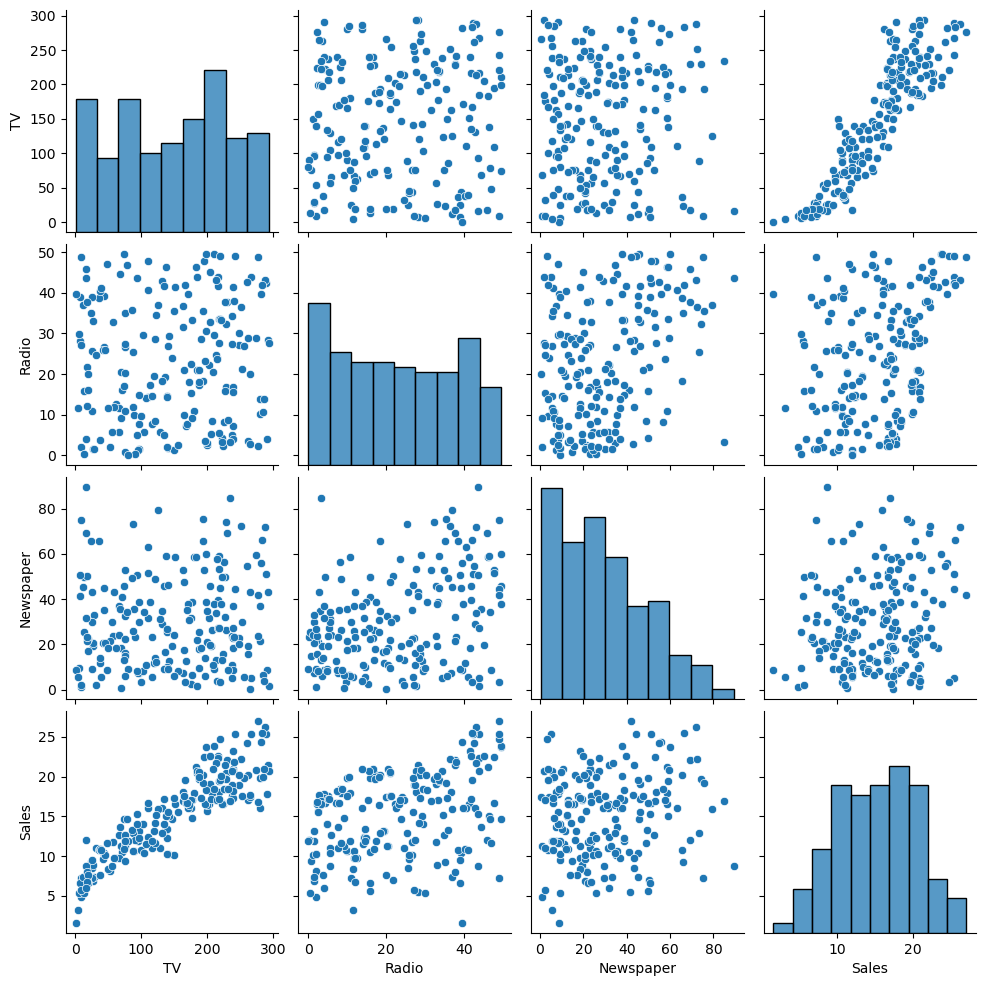

In [76]:
# Determine the relation between sales and Feature
sns.pairplot(data = df)
plt.show()

# Model preparation

In [79]:
# Defining features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

In [80]:
print(f"Features: \n{features}")
print(f"Labels: \n{labels}")

Features: 
        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[198 rows x 3 columns]
Labels: 
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 198, dtype: float64


In [81]:
TEST_SIZE = 0.2

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = TEST_SIZE, random_state = 342)

In [83]:
model = LinearRegression()
# Train model
model.fit(x_train, y_train)

LinearRegression()

In [86]:
# Model Accuracy on Test Data
model.score(x_test, y_test)

0.8493909896806155

In [95]:
### showing the fitted line on CERTAIN feature
Feature = "TV"

# first we will make new dataframe to store trained feature and predicted outcome
train_dict = {Feature: x_train[Feature], "Sales": y_train, "Predicted Outcome": model.predict(x_train)}
df_train = pd.DataFrame(train_dict)

# dataframe for storing testing data
test_dict = {Feature: x_test[Feature], "Target": y_test}
df_test = pd.DataFrame(test_dict)

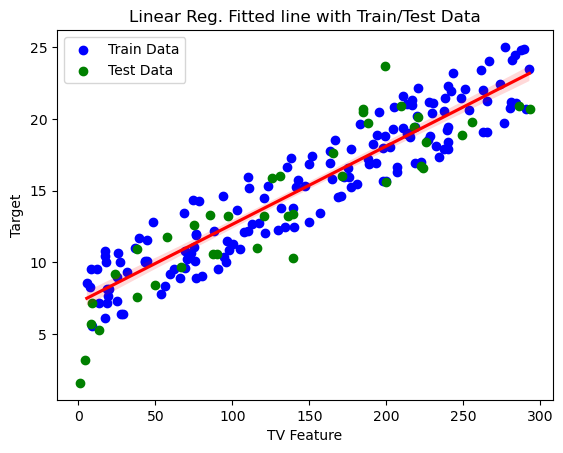

In [96]:
#  plotting train data
plt.scatter(df_train[Feature], df_train["Predicted Outcome"], color = "blue", label = "Train Data")

#  plotting test data
plt.scatter(df_test[Feature], df_test["Target"], color = "green", label = "Test Data")

# plot regreesion line 
sns.regplot(x = df_train[Feature], y = df_train["Predicted Outcome"], scatter = False, line_kws = {"color": "red"})

# labels
plt.xlabel(f"{Feature} Feature")
plt.ylabel("Target")
plt.title("Linear Reg. Fitted line with Train/Test Data")
plt.legend()
# show visualization
plt.show()

In [102]:
# Model Prediction on test data
test_dict = {"TV": [202, 310.56], "Radio" : [150, 31], "Newspaper": [51, 105]}
test_data = pd.DataFrame(test_dict)
test_data

,TV,Radio,Newspaper
0,202.00,150,51
1,310.56,31,105


In [103]:
# show predictions
test_data["Prediction"] = model.predict(test_data)
test_data

,TV,Radio,Newspaper,Prediction
0,202.00,150,51,32.710523
1,310.56,31,105,24.459675
